In [119]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pandas as pd
from scipy.signal import hilbert, chirp
import measures as nolds

In [4]:
def var(u_e):
    return np.var(u_e)

def freq(u_e):
    ind = argrelextrema(np.array(u_e), np.greater)
#     print(ind)
    diffs = np.diff(argrelextrema(np.array(u_e), np.greater))
#     print(diffs)
    n = int(len(diffs)/2)
    sub_ind = diffs[n-1:n+1]
    abso = np.absolute(sub_ind)
#   print(mean(abso), "here")
    #print(1/(0.01*mean(abso)))
    freq = 1/np.mean(abso)
    return 1/(0.01*np.mean(abso))
#TIME STEP IS SIZE 0.01

#print(freq(G[:,0]),freq(G[:,1]))

In [85]:
#FINAL ONE
#param
freq_x = []
freq_y = []
var_x =[]
z_list = list(np.arange(-3,0,0.05))
for z in z_list:
    #print(z)
    alpha = 3
    a = 0.7
    b = 0.8
    omega_sq = 1
    #model -> G[x,y]

    def model(G,t):
        return np.array([ alpha*(G[1] + G[0] - ((G[0]**3)/3) + z), -(1/alpha)*(G[0] - a + (b*G[1]) )])

    t = np.linspace(0, 100,  10000)              # time step
    G0 = np.array([0, 0])                     # initials conditions
    G = odeint(model, G0, t)

#     plt.show()
    freq_x.append(freq(G[:,0]))
    var_x.append(var(G[5000:,0]))
    freq_y.append(freq(G[:,1]))



/scinet/gpc/Applications/anaconda3/4.2.0_hub/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [86]:
#fixing the frequencies

freq_new = []

for i in range(len(z_list)):
    if var_x[i] < 0.1:
        freq_new.append(0)
    else:
        freq_new.append(freq_x[i])


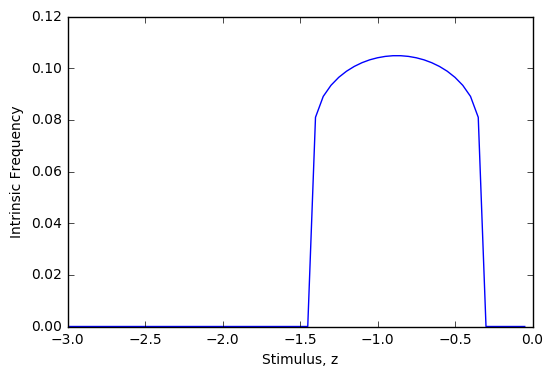

In [87]:
# #FINAL PLOT
plt.plot(z_list, freq_new)
plt.xlabel("Stimulus, z")
plt.ylabel("Intrinsic Frequency")
plt.show()
# freq_new

In [88]:
#dict of k:freq pairs
k_freq_dict = dict(zip(z_list, freq_new))
k_want =[]
freq_want=[]
for i in z_list:
    if k_freq_dict[i] >0 :
        k_want.append(i)
        freq_want.append(k_freq_dict[i])

In [89]:
#appendng 0 freq
k_want.append(z_list[31])
freq_want.append(freq_new[31])

In [90]:
k_want

[-1.4000000000000057,
 -1.3500000000000059,
 -1.300000000000006,
 -1.2500000000000062,
 -1.2000000000000064,
 -1.1500000000000066,
 -1.1000000000000068,
 -1.0500000000000069,
 -1.0000000000000071,
 -0.95000000000000728,
 -0.90000000000000746,
 -0.85000000000000764,
 -0.80000000000000782,
 -0.75000000000000799,
 -0.70000000000000817,
 -0.65000000000000835,
 -0.60000000000000853,
 -0.5500000000000087,
 -0.50000000000000888,
 -0.45000000000000906,
 -0.40000000000000924,
 -0.35000000000000941,
 -1.4500000000000055]

In [91]:
#GETTING THE VALUES FOR K1 AND K2
table = [k_want, freq_want]


k1_col = []
k1freq = []
k2_col = []
k2freq = []
perc_diff = []

k_freq = np.transpose(table)
k_freq
num_k_vals = np.shape(k_freq)[0] #num of rows

#k_freq is a 12x2 array with k values in first column and the corresponding freq in second, it contains the subset of k that 
#actually result in oscillations

for i in range(num_k_vals):
    for j in range(i,num_k_vals):
        #appending the k1 value from the ith row in the first column of k_freq
        k1_col.append(k_freq[:,0][i])
        #appending the k1 frequency from the ith row in the second column of k_freq
        k1freq.append(k_freq[:,1][i])
        k2_col.append(k_freq[:,0][j])
        k2freq.append(k_freq[:,1][j])
        
        #calculating the percent difference in frequencies
        perc = (1- (min(k_freq[j,1],k_freq[i,1])/max(k_freq[j,1],k_freq[i,1])))*100
        perc_diff.append(perc)

In [105]:
#converting to dataframe to see what data looks like
d = {'k1': k1_col, 'freq1': k1freq, 'k2': k2_col, 'freq2': k2freq, 'perc_diff': perc_diff}
df = pd.DataFrame(data=d)
df

df_sorted = df.sort_values(['k1', 'perc_diff'])
df_single = df_sorted.drop_duplicates('perc_diff')

df_single
df_single_new = df_single.reset_index()
final_df_numpy = df_single_new[1:16].values

In [114]:
np.shape(final_df_numpy)

(15, 6)

In [110]:
df_single_new[1:16]

,index,freq1,freq2,k1,k2,perc_diff
1,0,0.080981,0.080981,-1.4,-1.40,0.000000
2,1,0.080981,0.089077,-1.4,-1.35,9.088674
3,2,0.080981,0.093371,-1.4,-1.30,13.269320
4,18,0.080981,0.096442,-1.4,-0.50,16.031673
5,3,0.080981,0.096455,-1.4,-1.25,16.042920
6,4,0.080981,0.098814,-1.4,-1.20,18.047200
7,16,0.080981,0.100660,-1.4,-0.60,19.549848
8,5,0.080981,0.100671,-1.4,-1.15,19.558846
9,15,0.080981,0.102110,-1.4,-0.65,20.692581
10,6,0.080981,0.102122,-1.4,-1.10,20.701578


In [123]:
# #fixing the perc diff values -- final_df_numpy
# df_numpy = df_final.values
arr_perc_diff = final_df_numpy[:,5] #saving the 5th column (the percent differences)

# indices = [len(arr_perc_diff)-1] #saving a list of indices to remove rows from df_numpy becuase we don't want
#                                         #we don't want freq diff too close to one another
#                                         #the first element is the last index bc we dont want 100% diff (skews graph)
# first_diff = np.round(np.diff(arr_perc_diff))

# #going through first difference
# for i in range(len(first_diff)):
#     if first_diff[i] < 1:
#         indices.append(i)

# final_df_numpy = np.delete(df_numpy, indices, 0)
# #now final_df_numpy is same as df_numpy except a bunch of rows removed that we don't need
# print(final_df_numpy[:,4])
# print(np.shape(final_df_numpy))

In [106]:
#PART 2, PLOTTING COUPLED OSCI
#The following code defines the "right hand side" of the system of equations (also known as a vector field). 

from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [alpha, k1, k2, c, b,a]
    """
    x1, y1, x2, y2 = w
    alpha, k1, k2, c, b, a = p

    # Create f = (x1',y1',x2',y2'):
    f = [ alpha*(y1 + x1 - ((x1**3)/3) + k1+ c*x2),
         -(1/alpha)*( x1- a + (b*y1)), 
         alpha*(y2 + x2 - ((x2**3)/3) + k2+ c*x1),
        -(1/alpha)*( x2- a + (b*y2))]
    
    return f

In [109]:
final_df_numpy[:,2]

array([ 0.08098103,  0.08907694,  0.09337068,  0.09644235,  0.09645527,
        0.09881423,  0.10065988,  0.10067114,  0.10211028,  0.10212187,
        0.10322285,  0.10323469,  0.10402219,  0.1045539 ,  0.1048218 ])

In [115]:
# Use ODEINT to solve the differential equations defined by the vector field
solution_list = [] #from this we can get time series for everything

freq_listx1 = []
freq_listx2 = []

var_listx1 = []
var_listx2 = []

x1ts_list = []
x2ts_list = []

c_list = np.linspace(0,1,20)

#for each row in final_df_numpy set the k1 and k2
for i in range(np.shape(final_df_numpy)[0]):
    k1 = final_df_numpy[i,3]
    k2 = final_df_numpy[i,4]
    
    for c in c_list:

        # Parameter values
        alpha = 3
        a = 0.7
        b = 0.8

        # Initial conditions
        x1 = 0.0
        y1 = 0.0
        x2 = 0.0
        y2 = 0.0

        # Pack up the parameters and initial conditions:
        p = [alpha, k1, k2, c, b, a]
        w0 = [x1, y1, x2, y2]
        t = np.linspace(0, 100,  10000)              # time step

        #Call the ODE solver.
        wsol = odeint(vectorfield, w0, t, args=(p,))
        
        x1= wsol[:,0]
        x2= wsol[:,2]
        

        solution_list.append(wsol)
        
        freq_listx1.append(freq(x1))
        freq_listx2.append(freq(x2))
        
        var_listx2.append(var(x2))
        var_listx1.append(var(x1))

        x1ts_list.append(x1)
        x2ts_list.append(x2)

np.save('x1ts_listLATEST.npy', x1ts_list)
np.save('x2ts_listLATEST.npy',x2ts_list)

/scinet/gpc/Applications/anaconda3/4.2.0_hub/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [117]:
num_runs = len(x1ts_list)

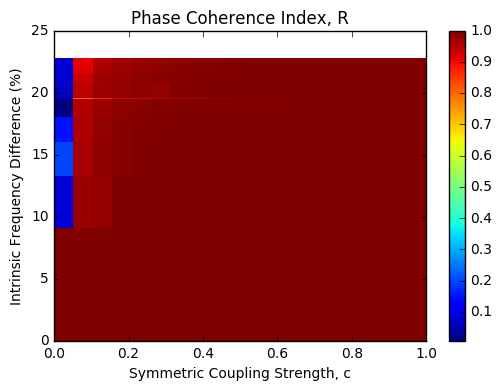

In [130]:
##CALCULATING THE R AGAIN BUT THIS WITH A DIFFERENT TECHNIQUE

## testing
#len(x1ts_list)
# signal = x1ts_list[0]
# analytic_signal = hilbert(x1ts_list[0])
# amplitude_envelope = np.abs(analytic_signal)
# instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# np.shape(instantaneous_phase)
# plt.plot(instantaneous_phase)
# plt.show()

#CALCULATING
new_phase_list = []

for i in range(num_runs):
    #print(i)
    signal1 = x1ts_list[i]
    signal2 = x2ts_list[i]

    analytic_signal1 = hilbert(signal1)
    analytic_signal2 = hilbert(signal2)

    instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
    instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
    
    diff = instantaneous_phase1 - instantaneous_phase2
    r = np.abs(np.sum(np.exp(1j*diff))/len(signal1))
    
    new_phase_list.append(r)
    
# PLOTTING
x=c_list
y=perc_diff_list #this is the last column - list of percent differences (15 of them)
z=np.array(new_phase_list)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

# plt.pcolormesh(X,Y,Z,edgecolor='k')
plt.pcolormesh(X,Y,Z)
plt.xlabel('Symmetric Coupling Strength, c')
plt.ylabel('Intrinsic Frequency Difference (%)')
plt.title('Phase Coherence Index, R')
plt.colorbar()
plt.show()

In [129]:
#data to use for the rest of the proj
# x axis - c_list

#y_axis
perc_diff_list = final_df_numpy[:,5]

print(len(c_list), len(perc_diff_list))
print(num_runs, len(x1ts_list), len(c_list)*len(perc_diff_list))

20 15
300 300 300


In [147]:
max_lyap_x1 = []
max_lyap_x2 = []

for i in range(num_runs):
    print(i)
    lx1 = nolds.lyap_r(x1ts_list[i], emb_dim = 5)
    lx2 = nolds.lyap_r(x2ts_list[i], emb_dim = 5)
    
    max_lyap_x1.append(lx1)
    max_lyap_x2.append(lx2)


np.save('max_lyap_x1_20LATESTtest.npy', max_lyap_x1)
np.save('max_lyap_x1_20LATESTtest.npy', max_lyap_x2)

0


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


1


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


21


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


22


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


23


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


41


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


42


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


43


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


44


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


61


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


62


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


63


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


64


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


65


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


66


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


67


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


68


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


69


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


70


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


71


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


72


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


73


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


74


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


75


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


76


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


77
78
79
80


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


81


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


82


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


83


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


84


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


85


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


101


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


102


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


103


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


104


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


105


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


106


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


107
108
109
110
111
112
113
114
115
116
117
118
119
120


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


121


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


122


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


123


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


124


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


125


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


126


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


127


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


128


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


129


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


130


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


131


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


132


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


133


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


134


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


135


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


136
137
138
139
140


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


141


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


142


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


143


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


144


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


145


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


146


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


147


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


148
149
150
151
152
153
154
155
156
157
158
159
160


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


161


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


162


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


163


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


164


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


165


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


166


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


167


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


168


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


169


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


170


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


171


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


172


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


173


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


174


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


175


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


176
177
178
179
180


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


181


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


182


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


183


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


184


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


185


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


186


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


187


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


188


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


189
190
191
192
193
194
195
196
197
198
199
200


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


201


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


202


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


203


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


204


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


205


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


206


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


207


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


208


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


209


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


210


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


211


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


212


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


213


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


214


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


215
216
217
218
219
220


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


221


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


222


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


223


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


224


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


225


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


226


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


227


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


228


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


229


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


230
231
232
233
234
235
236
237
238
239
240


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


241


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


242


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


243


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


244


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


245


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


246


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


247


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


248


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


249


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


250


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


251
252
253
254
255
256
257
258
259
260


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


261


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


262


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


263


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


264


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


265


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


266


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


267


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


268


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


269


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


270


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


271
272
273
274
275
276
277
278
279
280


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


281


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


282


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


283


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


284


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


285


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


286


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


287


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


288


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


289


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


290


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


291


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:278: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1855
  warnings.warn(msg.format(lag), RuntimeWarning)


292
293
294
295
296
297
298
299


layp x1


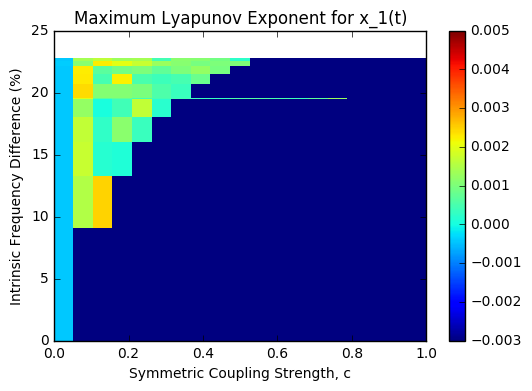

layp x2


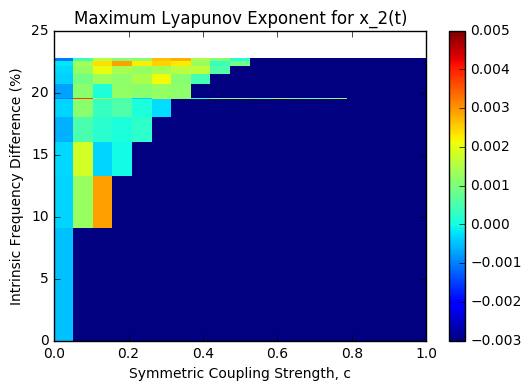

In [148]:
# #PLOTTING LYAP FOR X1
print("layp x1")
x=c_list
y=perc_diff_list
z=np.array(max_lyap_x1)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

#phase_list is arranged so that its a sequence of 15 groups, each of 50 values (for diff c), since numpy is row-major, it'll
#fill array by rows, so you want there to be 15 rows, and 50 columns

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z, vmin = -0.003, vmax = 0.005)
plt.xlabel('Symmetric Coupling Strength, c')
plt.ylabel('Intrinsic Frequency Difference (%)')
plt.title('Maximum Lyapunov Exponent for x_1(t)')
plt.colorbar()

plt.show()

#PLOTTING LYAP FOR X2
print("layp x2")

x=c_list
y=perc_diff_list
z=np.array(max_lyap_x2)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

#phase_list is arranged so that its a sequence of 15 groups, each of 50 values (for diff c), since numpy is row-major, it'll
#fill array by rows, so you want there to be 15 rows, and 50 columns

Z= z.reshape(len(y),len(x))

# plt.pcolormesh(X,Y,Z,edgecolor='k')
plt.pcolormesh(X,Y,Z, vmin = -0.003, vmax = 0.005)
plt.xlabel('Symmetric Coupling Strength, c')
plt.ylabel('Intrinsic Frequency Difference (%)')
plt.title('Maximum Lyapunov Exponent for x_2(t)')
plt.colorbar()

plt.show()

In [135]:
np.max(Z)

0.0044060959851829652

In [ ]:
dim_x1 = []
dim_x2 = []

for i in range(num_runs):
    dx1 = nolds.corr_dim(x1ts_list[i],10)
    dx2 = nolds.corr_dim(x2ts_list[i],10)
    
    dim_x1.append(dx1)
    dim_x2.append(dx2)

np.save('dim_x1.npy', dim_x1)
np.save('dim_x2.npy', dim_x2)

DIM x1


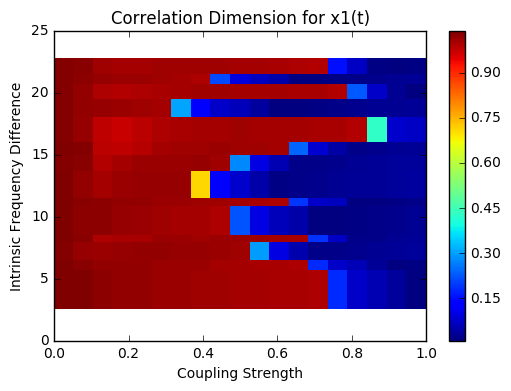

DIM x2


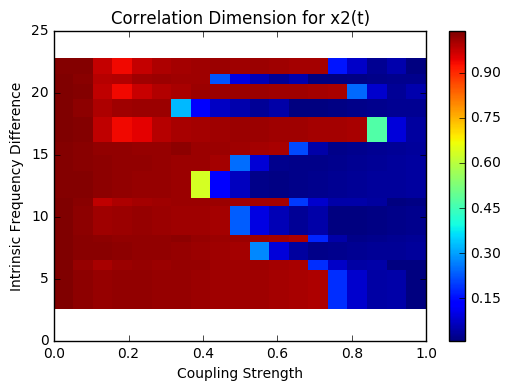

In [34]:
#PLOTTING DIM FOR X1
print("DIM x1")
x=c_list
y=perc_diff_list
z=np.array(dim_x1)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)
plt.title("Correlation Dimension for x1(t)")
plt.xlabel('Coupling Strength')
plt.ylabel('Intrinsic Frequency Difference')
plt.colorbar()

plt.show()

#PLOTTING LYAP FOR X2
print("DIM x2")

x=c_list
y=perc_diff_list
z=np.array(dim_x2)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)
plt.title("Correlation Dimension for x2(t)")
plt.xlabel('Coupling Strength')
plt.ylabel('Intrinsic Frequency Difference')
plt.colorbar()

plt.show()